In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

In [134]:
dataset = pd.read_excel('C:\\Users\\HP\\Desktop\\TugasKuliahInformatika\\STATKOM\\ProbabilitasNaiveBayes.xlsx')
dataset

,No,IPK,Usia,Jenis Kelamin,Kesehatan,Pengalaman Mengajar,Nilai tes Tertulis,Wawancara,HomeBase,Approve
0,1,Baik sekali,Middle,L,Baik,Ada,Sangat Bagus,Bagus,Tidak ada,Yes
1,2,Baik sekali,Middle,L,Baik,Tidak ada,Sangat Bagus,Sangat Bagus,Tidak ada,Yes
2,3,Baik,Middle,L,Baik,Ada,Bagus,Bagus,Ada,No
3,4,Memuaskan,Muda,L,Baik,Ada,Sangat Bagus,Sangat Bagus,Ada,No
4,5,Baik,Muda,L,Baik,Ada,Kurang,Bagus,Tidak ada,No
5,6,Baik,Tua,P,Baik,Ada,Bagus,Bagus,Tidak ada,Yes
6,7,Baik sekali,Middle,L,Baik,Tidak ada,Sangat Bagus,Sangat Bagus,Tidak ada,Yes
7,8,Baik,Muda,P,Baik,Tidak ada,Bagus,Bagus,Tidak ada,Yes
8,9,Baik,Muda,P,Baik,Ada,Kurang,Sangat Bagus,Tidak ada,No
9,10,Memuaskan,Muda,L,Baik,Tidak ada,Bagus,Sangat Bagus,Tidak ada,Yes


In [135]:
banyak_target = len(dataset['Approve'])
Yes = dataset[dataset['Approve'] == 'Yes']
banyak_Yes = len(Yes)
p_yes = banyak_Yes / banyak_target
print("Banyak Data pada kolom target", banyak_target)
print("Banyak Data Yes", banyak_Yes)
print(f"Probabilitas Yes: {p_yes:.2f}")

Banyak Data pada kolom target 37
Banyak Data Yes 22
Probabilitas Yes: 0.59


In [136]:
banyak_target = len(dataset['Approve'])
No = dataset[dataset['Approve'] == 'No']
banyak_No = len(No)
p_no = banyak_No / banyak_target
print("Banyak Data pada kolom target :", banyak_target)
print("Banyak Data No :", banyak_No)
print(f"Probabilitas No : {p_no:.2f}")

Banyak Data pada kolom target : 37
Banyak Data No : 15
Probabilitas No : 0.41


In [137]:
x = dataset.iloc[:, :9].values
# 'iloc' digunakan untuk indeks berbasis lokasi. [:, :9] artinya ambil semua baris dan kolom 0 hingga 8 (kolom ke-9 tidak termasuk).
# 'values' digunakan untuk mengonversi hasil ekstraksi ke dalam bentuk array NumPy.
# Sehingga, variabel x akan berisi fitur-fitur dari dataset.
y = dataset.iloc[:, 9].values
# 'iloc' digunakan kembali untuk indeks berbasis lokasi. [:, 9] artinya ambil semua baris dari kolom ke-9.
# Sehingga, variabel y akan berisi target atau label yang ingin diprediksi atau dianalisis.

In [138]:
print(x)

[[1 'Baik sekali' 'Middle' 'L' 'Baik' 'Ada' 'Sangat Bagus' 'Bagus'
  'Tidak ada']
 [2 'Baik sekali' 'Middle' 'L' 'Baik' 'Tidak ada' 'Sangat Bagus'
  'Sangat Bagus' 'Tidak ada']
 [3 'Baik' 'Middle' 'L' 'Baik' 'Ada' 'Bagus' 'Bagus' 'Ada']
 [4 'Memuaskan' 'Muda' 'L' 'Baik' 'Ada' 'Sangat Bagus' 'Sangat Bagus'
  'Ada']
 [5 'Baik' 'Muda' 'L' 'Baik' 'Ada' 'Kurang' 'Bagus' 'Tidak ada']
 [6 'Baik' 'Tua' 'P' 'Baik' 'Ada' 'Bagus' 'Bagus' 'Tidak ada']
 [7 'Baik sekali' 'Middle' 'L' 'Baik' 'Tidak ada' 'Sangat Bagus'
  'Sangat Bagus' 'Tidak ada']
 [8 'Baik' 'Muda' 'P' 'Baik' 'Tidak ada' 'Bagus' 'Bagus' 'Tidak ada']
 [9 'Baik' 'Muda' 'P' 'Baik' 'Ada' 'Kurang' 'Sangat Bagus' 'Tidak ada']
 [10 'Memuaskan' 'Muda' 'L' 'Baik' 'Tidak ada' 'Bagus' 'Sangat Bagus'
  'Tidak ada']
 [11 'Baik' 'Tua' 'L' 'Baik' 'Ada' 'Sangat Bagus' 'Sangat Bagus' 'Ada']
 [12 'Baik' 'Middle' 'L' 'Baik' 'Tidak ada' 'Kurang' 'Kurang' 'Tidak ada']
 [13 'Baik' 'Middle' 'L' 'Baik' 'Ada' 'Bagus' 'Sangat Bagus' 'Tidak ada']
 [14 'Baik' '

In [139]:
print(y)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No']


In [140]:
# Import kelas LabelEncoder dari scikit-learn
from sklearn.preprocessing import LabelEncoder

In [141]:
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])
x[:, 1] = le.fit_transform(x[:, 1])
x[:, 2] = le.fit_transform(x[:, 2])
x[:, 3] = le.fit_transform(x[:, 3])
x[:, 4] = le.fit_transform(x[:, 4])
x[:, 5] = le.fit_transform(x[:, 5])
x[:, 6] = le.fit_transform(x[:, 6])
x[:, 7] = le.fit_transform(x[:, 7])
x[:, 8] = le.fit_transform(x[:, 8])


In [142]:
print(x)

[[0 1 0 0 0 0 2 0 1]
 [1 1 0 0 0 1 2 2 1]
 [2 0 0 0 0 0 0 0 0]
 [3 2 1 0 0 0 2 2 0]
 [4 0 1 0 0 0 1 0 1]
 [5 0 2 1 0 0 0 0 1]
 [6 1 0 0 0 1 2 2 1]
 [7 0 1 1 0 1 0 0 1]
 [8 0 1 1 0 0 1 2 1]
 [9 2 1 0 0 1 0 2 1]
 [10 0 2 0 0 0 2 2 0]
 [11 0 0 0 0 1 1 1 1]
 [12 0 0 0 0 0 0 2 1]
 [13 0 0 0 0 0 0 2 0]
 [14 1 1 0 0 1 0 2 1]
 [15 1 1 0 0 1 0 2 1]
 [16 0 1 0 0 0 1 0 1]
 [17 0 2 1 0 0 0 0 1]
 [18 2 1 0 0 0 2 2 0]
 [19 2 1 0 0 1 3 2 1]
 [20 0 2 0 0 0 2 2 0]
 [21 2 1 0 0 1 0 2 1]
 [22 0 2 0 0 0 2 2 0]
 [23 0 0 0 0 1 1 1 1]
 [24 2 1 0 0 1 0 2 1]
 [25 2 1 0 0 1 0 2 1]
 [26 2 1 0 0 1 0 2 1]
 [27 2 1 0 0 1 0 2 1]
 [28 0 0 0 0 1 1 1 1]
 [29 2 1 0 0 1 0 2 1]
 [30 0 2 0 0 0 2 2 0]
 [31 0 0 0 0 1 1 1 1]
 [32 2 1 0 0 1 0 2 1]
 [33 2 1 0 0 1 0 2 1]
 [34 2 1 0 0 1 0 2 1]
 [35 2 1 0 0 1 0 2 1]
 [36 0 0 0 0 1 1 1 1]]


In [143]:
#MENGHITUNG PROBABILITAS KELAS ATRIBUT
# #KOLOM IPK
#YES
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'Yes'
banyak_yes_1 = np.sum((x[:, 1] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'Yes'
banyak_yes_0 = np.sum((x[:, 1] == 0) & (x[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'Yes'
banyak_yes_2 = np.sum((x[:, 1] == 2) & (x[:, -1] == 1))
# Cetak hasil
print("---------------------- IPK -----------------------")
print("Banyak data Baik sekali Pada IPK Yes: ", banyak_yes_1)
print("Banyak data Baik Pada IPK Yes : ", banyak_yes_0)
print("Banyak data Memuaskan Pada IPK Yes : ", banyak_yes_2)
#NO
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'No'
banyak_no_1 = np.sum((x[:, 1] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'No'
banyak_no_0 = np.sum((x[:, 1] == 0) & (x[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'No'
banyak_no_2 = np.sum((x[:, 1] == 2) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik sekali Pada IPK No : ", banyak_no_1)
print("Banyak data Baik Pada IPK No : ", banyak_no_0)
print("Banyak data Memuaskan Pada IPK No: ", banyak_no_2)
#Probabilitas Kolom IPK
prob_yes_1IPK = banyak_yes_1 / banyak_Yes
prob_yes_0IPK = banyak_yes_0 / banyak_Yes
prob_yes_2IPK = banyak_yes_2 / banyak_Yes

prob_no_1IPK = banyak_no_1 / banyak_No
prob_no_0IPK = banyak_no_0 / banyak_No
prob_no_2IPK = banyak_no_2 / banyak_No

print(f"Probabilitas Baik sekali Yes :{prob_yes_1IPK:.2f}")
print(f"Probabilitas Baik Yes :{prob_yes_0IPK:.2f}")
print(f"Probabilitas Memuaskan Yes :{prob_yes_2IPK:.2f}")

print(f"Probabilitas Baik sekali No :{prob_no_1IPK:.2f}")
print(f"Probabilitas Baik No :{prob_no_0IPK:.2f}")
print(f"Probabilitas Memuaskan No:{prob_no_2IPK:.2f}")

---------------------- IPK -----------------------
Banyak data Baik sekali Pada IPK Yes:  5
Banyak data Baik Pada IPK Yes :  12
Banyak data Memuaskan Pada IPK Yes :  12
Banyak data Baik sekali Pada IPK No :  0
Banyak data Baik Pada IPK No :  6
Banyak data Memuaskan Pada IPK No:  2
Probabilitas Baik sekali Yes :0.23
Probabilitas Baik Yes :0.55
Probabilitas Memuaskan Yes :0.55
Probabilitas Baik sekali No :0.00
Probabilitas Baik No :0.40
Probabilitas Memuaskan No:0.13


In [144]:
#KOLOM USIA
#YES
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'Yes'
banyak_1_yesUsia = np.sum((x[:, 2] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'Yes'
banyak_0_yesUsia = np.sum((x[:, 2] == 0) & (x[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'Yes'
banyak_2_yesUsia = np.sum((x[:, 2] == 2) & (x[:, -1] == 1))
# Cetak hasil
print("-------------- Usia ------------------------")
print("Banyak data Muda Pada Usia Yes : ", banyak_1_yesUsia)
print("Banyak data Middle Pada Usia Yes : ", banyak_0_yesUsia)
print("Banyak data Tua Pada Usia Yes : ", banyak_2_yesUsia)
#NO
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'No'
banyak_1_noUsia = np.sum((x[:, 2] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'No'
banyak_0_noUsia = np.sum((x[:, 2] == 0) & (x[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'No'
banyak_2_noUsia = np.sum((x[:, 2] == 2) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Muda Pada Usia No : ", banyak_1_noUsia)
print("Banyak data Middle Pada Usia No : ", banyak_0_noUsia)
print("Banyak data Tua Pada Usia No : ", banyak_2_noUsia)
#Probabilitas Kolom Usia
prob_1_yesUsia = banyak_1_yesUsia / banyak_Yes
prob_0_yesUsia = banyak_0_yesUsia / banyak_Yes
prob_2_yesUsia = banyak_2_yesUsia / banyak_Yes

prob_1_noUsia = banyak_1_noUsia / banyak_No
prob_0_noUsia = banyak_0_noUsia / banyak_No
prob_2_noUsia = banyak_2_noUsia / banyak_No

print(f"Probabilitas Muda Yes :{prob_1_yesUsia:.2f}")
print(f"Probabilitas Middle Yes :{prob_0_yesUsia:.2f}")
print(f"Probabilitas Tua Yes :{prob_2_yesUsia:.2f}")

print(f"Probabilitas Muda No :{prob_1_noUsia:.2f}")
print(f"Probabilitas Middle No :{prob_0_noUsia:.2f}")
print(f"Probabilitas Tua No :{prob_2_noUsia:.2f}")

-------------- Usia ------------------------
Banyak data Muda Pada Usia Yes :  18
Banyak data Middle Pada Usia Yes :  9
Banyak data Tua Pada Usia Yes :  2
Banyak data Muda Pada Usia No :  2
Banyak data Middle Pada Usia No :  2
Banyak data Tua Pada Usia No :  4
Probabilitas Muda Yes :0.82
Probabilitas Middle Yes :0.41
Probabilitas Tua Yes :0.09
Probabilitas Muda No :0.13
Probabilitas Middle No :0.13
Probabilitas Tua No :0.27


In [145]:
#KOLOM Jenis Kelamin
#YES
# Hitung banyaknya data '1' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_1_yesJK = np.sum((x[:, 3] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_0_yesJk = np.sum((x[:, 3] == 0) & (x[:, -1] == 1))
# Cetak hasil
print("-------------------- Jenis Kelamin -----------------------")
print("Banyak data Perempuan Pada Jenis Kelamin Yes : ", banyak_1_yesJK)
print("Banyak data Laki-laki Pada Jenis Kelamin Yes: ", banyak_0_yesJk)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noJk = np.sum((x[:, 3] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noJk = np.sum((x[:, 3] == 0) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Perempuan Pada Jenis Kelamin No: ", banyak_1_noJk)
print("Banyak data laki-laki Pada Jenis Kelamin No : ", banyak_0_noJk)
#Probabilitas Kolom Jenis Kelamin
prob_1_yesJK = banyak_1_yesJK / banyak_Yes
prob_0_yesJK = banyak_0_yesJk / banyak_Yes

prob_1_noJK = banyak_1_noJk / banyak_No
prob_0_noJK = banyak_0_noJk / banyak_No

print(f"Probabilitas Perempuan Yes :{prob_1_yesJK:.2f}")
print(f"Probabilitas Laki-Laki Yes :{prob_0_yesJK:.2f}")

print(f"Probabilitas Perempuan No :{prob_1_noJK:.2f}")
print(f"Probabilitas Laki-laki No :{prob_0_noJK:.2f}")

-------------------- Jenis Kelamin -----------------------
Banyak data Perempuan Pada Jenis Kelamin Yes :  4
Banyak data Laki-laki Pada Jenis Kelamin Yes:  25
Banyak data Perempuan Pada Jenis Kelamin No:  0
Banyak data laki-laki Pada Jenis Kelamin No :  8
Probabilitas Perempuan Yes :0.18
Probabilitas Laki-Laki Yes :1.14
Probabilitas Perempuan No :0.00
Probabilitas Laki-laki No :0.53


In [146]:
#KOLOM Kesehatan
#YES
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'Yes'
banyak_0_yesKesehatan = np.sum((x[:, 4] == 0) & (x[:, -1] == 1))
# Cetak hasil
print("-------------------- Kesehatan -----------------------")
print("Banyak data Baik Pada Kesehatan Yes : ", banyak_0_yesKesehatan)
#NO
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'No'
banyak_0_noKesehatan = np.sum((x[:, 4] == 0) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik Pada Kesehatan No : ", banyak_0_noKesehatan)
#Probabilitas Kolom Kesehatan
prob_0_yesKese = banyak_0_yesKesehatan / banyak_Yes
prob_0_noKese = banyak_0_noKesehatan / banyak_No

print(f"Probabilitas Baik Yes :{prob_0_yesKese:.2f}")

print(f"Probabilitas Baik No :{prob_0_noKese:.2f}")

-------------------- Kesehatan -----------------------
Banyak data Baik Pada Kesehatan Yes :  29
Banyak data Baik Pada Kesehatan No :  8
Probabilitas Baik Yes :1.32
Probabilitas Baik No :0.53


In [147]:
#KOLOM Pengalaman Mengajar
#YES
# Hitung banyaknya data '1' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_1_yesPM = np.sum((x[:, 5] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_0_yesPM = np.sum((x[:, 5] == 0) & (x[:, -1] == 1))
# Cetak hasil
print("-------------------- Pengalaman Mengajar --------------------------------")
print("Banyak data Tidak ada Pada Pengalaman mengajar Yes : ", banyak_1_yesPM)
print("Banyak data Ada Pada Penglaman Mengajar Data Yes : ", banyak_0_yesPM)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noPM = np.sum((x[:, 5] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noPm = np.sum((x[:, 5] == 0) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada Pengalaman mengajar No : ", banyak_1_noPM)
print("Banyak data Ada Pada Penglaman Mengajar No : ", banyak_0_noPm)
#Probabilitas Kolom Pengalaman Mengajar
prob_1_yesPM = banyak_1_yesPM / banyak_Yes
prob_0_yesPM = banyak_0_yesPM / banyak_Yes

prob_1_noPM = banyak_1_noPM / banyak_No
prob_0_noPM = banyak_0_noPm / banyak_No

print(f"Probabilitas Tidak ada Yes :{prob_1_yesPM:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yesPM:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_noPM:.2f}")
print(f"Probabilitas Ada No :{prob_0_noPM:.2f}")

-------------------- Pengalaman Mengajar --------------------------------
Banyak data Tidak ada Pada Pengalaman mengajar Yes :  22
Banyak data Ada Pada Penglaman Mengajar Data Yes :  7
Banyak data Tidak ada Pada Pengalaman mengajar No :  0
Banyak data Ada Pada Penglaman Mengajar No :  8
Probabilitas Tidak ada Yes :1.00
Probabilitas Ada Yes :0.32
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :0.53


In [148]:
#KOLOM NILAI TES TERTULIS
#YES
# Hitung banyaknya data '1' pada kolom Nilai tes tertulis untuk kasus 'Yes'
banyak_1_yesNTT = np.sum((x[:, 6] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_0_yesNTT = np.sum((x[:, 6] == 0) & (x[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_2_yesNTT = np.sum((x[:, 6] == 2) & (x[:, -1] == 1))
# Cetak hasil
print("-------------------------------- Nilai Tes Tertulis -----------------------------")
print("Banyak data kurang Pada Kolom Nilai tes tertulis Yes : ", banyak_1_yesNTT)
print("Banyak data bagus Pada kolom Nilai tes tertulis Yes : ", banyak_0_yesNTT)
print("Banyak data sangat bagus Pada kolom nilai tes tertulis Yes : ", banyak_2_yesNTT)
#NO
# Hitung banyaknya data '1' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_1_noNTT = np.sum((x[:, 6] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_0_noNTT = np.sum((x[:, 6] == 0) & (x[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_2_noNTT = np.sum((x[:, 6] == 2) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom nilai tes tertulis No : ", banyak_1_noNTT)
print("Banyak data bagus Pada kolom nilai tes tertulis No : ", banyak_0_noNTT)
print("Banyak data sangat bgaus Pada kolom nilai tes tertulis No : ", banyak_2_noNTT)
#Probabilitas Kolom Nilai tes tertulis
prob_1_yesNTT = banyak_1_yesNTT / banyak_Yes
prob_0_yesNTT = banyak_0_yesNTT / banyak_Yes
prob_2_yesNTT = banyak_2_yesNTT / banyak_Yes

prob_1_noNTT = banyak_1_noNTT / banyak_No
prob_0_noNTT = banyak_0_noNTT / banyak_No
prob_2_noNTT = banyak_2_noNTT / banyak_No

print(f"Probabilitas Kurang Yes :{prob_1_yesNTT:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yesNTT:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yesNTT:.2f}")

print(f"Probabilitas Kurang No :{prob_1_noNTT:.2f}")
print(f"Probabilitas Bagus No :{prob_0_noNTT:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_noNTT:.2f}")

-------------------------------- Nilai Tes Tertulis -----------------------------
Banyak data kurang Pada Kolom Nilai tes tertulis Yes :  8
Banyak data bagus Pada kolom Nilai tes tertulis Yes :  17
Banyak data sangat bagus Pada kolom nilai tes tertulis Yes :  3
Banyak data kurang Pada kolom nilai tes tertulis No :  0
Banyak data bagus Pada kolom nilai tes tertulis No :  2
Banyak data sangat bgaus Pada kolom nilai tes tertulis No :  6
Probabilitas Kurang Yes :0.36
Probabilitas Bagus Yes :0.77
Probabilitas Sangat Bagus Yes :0.14
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.13
Probabilitas Sangat bagus No :0.40


In [149]:
#KOLOM WAWANCARA
#YES
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'Yes'
banyak_1_yeswawancara = np.sum((x[:, 7] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'Yes'
banyak_0_yeswawancara = np.sum((x[:, 7] == 0) & (x[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'Yes'
banyak_2_yeswawancara = np.sum((x[:, 7] == 2) & (x[:, -1] == 1))
# Cetak hasil
print("----------------------------- Wawancara----------------------------------------")
print("Banyak data kurang Pada Kolom wawancara Yes : ", banyak_1_yeswawancara)
print("Banyak data bagus Pada kolom wawancara  yes : ", banyak_0_yeswawancara)
print("Banyak data sangat bagus Pada kolom wawancara  yes : ", banyak_2_yeswawancara)
#NO
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'No'
banyak_1_nowawancara = np.sum((x[:, 7] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'No'
banyak_0_nowawancara = np.sum((x[:, 7] == 0) & (x[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'No'
banyak_2_nowawancara = np.sum((x[:, 7] == 2) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom wawancara no : ", banyak_1_nowawancara)
print("Banyak data bagus Pada kolom wawancara no : ", banyak_0_nowawancara)
print("Banyak data sangat bgaus Pada kolom wawancara no : ", banyak_2_nowawancara)
#Probabilitas Kolom wawancara
prob_1_yesWW = banyak_1_yeswawancara / banyak_Yes
prob_0_yesWW = banyak_0_yeswawancara / banyak_Yes
prob_2_yesWW = banyak_2_yeswawancara / banyak_Yes

prob_1_noWW = banyak_1_nowawancara / banyak_No
prob_0_noWW = banyak_0_nowawancara / banyak_No
prob_2_noWW = banyak_2_nowawancara / banyak_No

print(f"Probabilitas Kurang Yes :{prob_1_yesWW:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yesWW:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yesWW:.2f}")

print(f"Probabilitas Kurang No :{prob_1_noWW:.2f}")
print(f"Probabilitas Bagus No :{prob_0_noWW:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_noWW:.2f}")

----------------------------- Wawancara----------------------------------------
Banyak data kurang Pada Kolom wawancara Yes :  5
Banyak data bagus Pada kolom wawancara  yes :  6
Banyak data sangat bagus Pada kolom wawancara  yes :  18
Banyak data kurang Pada kolom wawancara no :  0
Banyak data bagus Pada kolom wawancara no :  1
Banyak data sangat bgaus Pada kolom wawancara no :  7
Probabilitas Kurang Yes :0.23
Probabilitas Bagus Yes :0.27
Probabilitas Sangat Bagus Yes :0.82
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.07
Probabilitas Sangat bagus No :0.47


In [150]:
#KOLOM Homebase
#YES
# Hitung banyaknya data '1' pada kolom Homebase untuk kasus 'Yes'
banyak_1_yesHb = np.sum((x[:, 8] == 1) & (x[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'Yes'
banyak_0_yesHb = np.sum((x[:, 8] == 0) & (x[:, -1] == 1))
# Cetak hasil
print("-------------------- Homebase --------------------------------")
print("Banyak data Tidak ada Pada kolom Homebase Yes : ", banyak_1_yesHb)
print("Banyak data Ada Pada kolom Homebase Yes : ", banyak_0_yesHb)
#NO
# Hitung banyaknya data '1' pada kolom homebase untuk kasus 'No'
banyak_1_nohb = np.sum((x[:, 8] == 1) & (x[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'No'
banyak_0_nohb = np.sum((x[:, 8] == 0) & (x[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada kolom homebase No : ", banyak_1_nohb)
print("Banyak data Ada Pada kolom homebase No : ", banyak_0_nohb)
#Probabilitas Kolom Homebase
prob_1_yesHome = banyak_1_yesHb / banyak_Yes
prob_0_yesHome = banyak_0_yesHb / banyak_Yes

prob_1_noHome = banyak_1_nohb / banyak_No
prob_0_noHome = banyak_0_nohb / banyak_No

print(f"Probabilitas Tidak ada Yes :{prob_1_yesHome:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yesHome:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_noHome:.2f}")
print(f"Probabilitas Ada No :{prob_0_noHome:.2f}")

-------------------- Homebase --------------------------------
Banyak data Tidak ada Pada kolom Homebase Yes :  29
Banyak data Ada Pada kolom Homebase Yes :  0
Banyak data Tidak ada Pada kolom homebase No :  0
Banyak data Ada Pada kolom homebase No :  8
Probabilitas Tidak ada Yes :1.32
Probabilitas Ada Yes :0.00
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :0.53


In [151]:
#MENGHITUNG DATA TES UJI
def hitung_prediksi(param1, param2, param3, param4, param5, param6, param7, param8):
    p_yes = 0.59
    p_no = 0.41
    # YES
    prob_IPK_yes = {'1': 0.23, '0': 0.55, '2': 0.55}
    prob_Umur_yes = {'1': 0.82, '0': 0.41, '2': 0.09}
    prob_Jk_yes = {'1': 0.18, '0': 1.14}
    prob_Kesehatan_yes = {'0': 1.32}
    prob_PM_yes = {'1': 1.00, '0': 0.32}
    prob_NTT_yes = {'1': 0.36, '0': 0.77, '2': 0.14}
    prob_Ww_yes = {'1': 0.23, '0': 0.27, '2': 0.82}
    prob_Home_yes = {'1': 1.32, '0': 0.00}

    # NO
    prob_IPK_No = {'1': 0.00, '0': 0.40, '2': 0.13}
    prob_Umur_No = {'1': 0.13, '0': 0.13, '2': 0.27}
    prob_Jk_No = {'1': 0.00, '0': 0.53}
    prob_Kesehatan_No = {'0': 0.53}
    prob_PM_No = {'1': 0.00, '0': 0.53}
    prob_NTT_No = {'1': 0.00, '0': 0.13, '2': 0.40}
    prob_Ww_No = {'1': 0.00, '0': 0.07, '2': 0.47}
    prob_Home_No = {'1': 0.00, '0': 0.53}

    prob_yes_pred = (
        p_yes * prob_IPK_yes.get(param1, 0) * prob_Umur_yes.get(param2, 0) * prob_Jk_yes.get(param3, 0) *
        prob_Kesehatan_yes.get(param4, 0) * prob_PM_yes.get(param5, 0) * prob_NTT_yes.get(param6, 0) *
        prob_Ww_yes.get(param7, 0) * prob_Home_yes.get(param8, 0)
    )
    print("Probabilitas Yes: ", prob_yes_pred)

    prob_no_pred = (
        p_no * prob_IPK_No.get(param1, 0) * prob_Umur_No.get(param2, 0) * prob_Jk_No.get(param3, 0) *
        prob_Kesehatan_No.get(param4, 0) * prob_PM_No.get(param5, 0) * prob_NTT_No.get(param6, 0) *
        prob_Ww_No.get(param7, 0) * prob_Home_No.get(param8, 0)
    )
    print("Probabilitas No: ", prob_no_pred)

    prediksi = max(prob_yes_pred, prob_no_pred)

    if prediksi == prob_yes_pred:
        return 'Yes'
    else:
        return 'No'

# Mengambil input dari pengguna
ipk_input = input('Masukkan kriteria IPK? (1/0/2): ')
usia_input = input('Usia anda termasuk kategori apa? (1/0/2): ')
jk_input = input('Masukkan Jenis Kelamin? (1/0): ')
kesehatan_input = input('Kesehatan anda termasuk? (0): ')
pengalaman_input = input('Apakah ada pengalaman mengajar? (1/0): ')
ntt_input = input('Masukkan kriteria Nilai Tertulis anda? (1/0/2): ')
ww_input = input('Masukkan kriteria wawancara anda? (1/0/2): ')
homebase_input = input('Apakah memiliki homebase? (1/0): ')

# Memanggil fungsi untuk melakukan prediksi
kelas_prediksi = hitung_prediksi(ipk_input, usia_input, jk_input, kesehatan_input, pengalaman_input, ntt_input, ww_input, homebase_input)

# Menampilkan input pengguna dan hasil prediksi
print("\nInput Pengguna:")
print("Kriteria IPK:", ipk_input)
print("Usia:", usia_input)
print("Jenis Kelamin:", jk_input)
print("Kesehatan:", kesehatan_input)
print("Pengalaman Mengajar:", pengalaman_input)
print("Nilai Tertulis:", ntt_input)
print("Wawancara:", ww_input)
print("Homebase:", homebase_input)

print("\nPrediksi Kelas:", kelas_prediksi)


Probabilitas Yes:  0.0013367746348830723
Probabilitas No:  0.0

Input Pengguna:
Kriteria IPK: 1
Usia: 0
Jenis Kelamin: 0
Kesehatan: 0
Pengalaman Mengajar: 0
Nilai Tertulis: 2
Wawancara: 0
Homebase: 1

Prediksi Kelas: Yes


In [78]:
# Import fungsi train_test_split dari scikit-learn
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.8, random_state= 0)

In [80]:
print(x_train)

[[18 2 1 0 0 0 2 2 0]
 [21 2 1 0 0 1 0 2 1]
 [19 2 1 0 0 1 3 2 1]
 [9 2 1 0 0 1 0 2 1]
 [35 2 1 0 0 1 0 2 1]
 [3 2 1 0 0 0 2 2 0]
 [0 1 0 0 0 0 2 0 1]]


In [81]:
# Mendefinisikan banyak_training_yes dan banyak_training_no
banyak_training_yes = len(y_train[y_train == 'Yes'])
banyak_training_no = len(y_train[y_train == 'No'])

# Menghitung probabilitas
prob_yes = banyak_training_yes / len(y_train)
prob_no = banyak_training_no / len(y_train)

In [82]:
print("Banyak Data Training Yes: ", banyak_training_yes)
print("Banyak Data Training No: ", banyak_training_no)
prob_yes = banyak_training_yes/len(x_train)
prob_no = banyak_training_no/len(x_train)

print(f"Probabilitas Yes: {prob_yes:.2f}")
print(f"Probabilitas No: {prob_no:.2f}")

Banyak Data Training Yes:  5
Banyak Data Training No:  2
Probabilitas Yes: 0.71
Probabilitas No: 0.29


In [83]:
#MENGHITUNG PROBABILITAS KELAS ATRIBUT DATA TRAINING
#KOLOM IPK
#YES
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'Yes'
banyak_1_yes = np.sum((x_train[:, 1] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'Yes'
banyak_0_yes = np.sum((x_train[:, 1] == 0) & (x_train[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'Yes'
banyak_2_yes = np.sum((x_train[:, 1] == 2) & (x_train[:, -1] == 1))
# Cetak hasil
print("---------------------- IPK Data Training -----------------------")
print("Banyak data Baik sekali Pada IPK Data Training kasus Yes : ", banyak_1_yes)
print("Banyak data Baik Pada IPK Data Training kasus Yes : ", banyak_0_yes)
print("Banyak data Memuaskan Pada IPK Data Training kasus Yes : ", banyak_2_yes)
#NO
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'No'
banyak_1_no = np.sum((x_train[:, 1] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'No'
banyak_0_no = np.sum((x_train[:, 1] == 0) & (x_train[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'No'
banyak_2_no = np.sum((x_train[:, 1] == 2) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik sekali Pada IPK Data Training Kasus No : ", banyak_1_no)
print("Banyak data Baik Pada IPK Data Training kasus No : ", banyak_0_no)
print("Banyak data Memuaskan Pada IPK Data Training kasus No : ", banyak_2_no)
#Probabilitas Kolom IPK
prob_1_yes = banyak_1_yes / banyak_training_yes
prob_0_yes = banyak_0_yes / banyak_training_yes
prob_2_yes = banyak_2_yes / banyak_training_yes

prob_1_no = banyak_1_no / banyak_training_no
prob_0_no = banyak_0_no / banyak_training_no
prob_2_no = banyak_2_no / banyak_training_no

print(f"Probabilitas Baik sekali Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Baik Yes :{prob_0_yes:.2f}")
print(f"Probabilitas Memuaskan Yes :{prob_2_yes:.2f}")

print(f"Probabilitas Baik sekali No :{prob_1_no:.2f}")
print(f"Probabilitas Baik No :{prob_0_no:.2f}")
print(f"Probabilitas Memuaskan No:{prob_2_no:.2f}")

---------------------- IPK Data Training -----------------------
Banyak data Baik sekali Pada IPK Data Training kasus Yes :  1
Banyak data Baik Pada IPK Data Training kasus Yes :  0
Banyak data Memuaskan Pada IPK Data Training kasus Yes :  4
Banyak data Baik sekali Pada IPK Data Training Kasus No :  0
Banyak data Baik Pada IPK Data Training kasus No :  0
Banyak data Memuaskan Pada IPK Data Training kasus No :  2
Probabilitas Baik sekali Yes :0.20
Probabilitas Baik Yes :0.00
Probabilitas Memuaskan Yes :0.80
Probabilitas Baik sekali No :0.00
Probabilitas Baik No :0.00
Probabilitas Memuaskan No:1.00


In [84]:
#KOLOM USIA
#YES
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'Yes'
banyak_1_yesUsia = np.sum((x_train[:, 2] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'Yes'
banyak_0_yesUsia = np.sum((x_train[:, 2] == 0) & (x_train[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'Yes'
banyak_2_yesUsia = np.sum((x_train[:, 2] == 2) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------- Usia pada Data Training ------------------------")
print("Banyak data Muda Pada Usia Data Training kasus Yes: ", banyak_1_yesUsia)
print("Banyak data Middle Pada Usia Data Training kasus Yes : ", banyak_0_yesUsia)
print("Banyak data Tua Pada Usia Data Training kasus Yes : ", banyak_2_yesUsia)
#NO
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'No'
banyak_1_noUsia = np.sum((x_train[:, 2] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'No'
banyak_0_noUsia = np.sum((x_train[:, 2] == 0) & (x_train[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'No'
banyak_2_noUsia = np.sum((x_train[:, 2] == 2) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Muda Pada Usia Data Training kasus No : ", banyak_1_noUsia)
print("Banyak data Middle Pada Usia Data Training kasus No : ", banyak_0_noUsia)
print("Banyak data Tua Pada Usia Data Training kasus No : ", banyak_2_noUsia)
#Probabilitas Kolom Usia
prob_1_yes = banyak_1_yesUsia / banyak_training_yes
prob_0_yes = banyak_0_yesUsia / banyak_training_yes
prob_2_yes = banyak_2_yesUsia / banyak_training_yes

prob_1_no = banyak_1_noUsia / banyak_training_no
prob_0_no = banyak_0_noUsia / banyak_training_no
prob_2_no = banyak_2_noUsia / banyak_training_no

print(f"Probabilitas Muda Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Middle Yes :{prob_0_yes:.2f}")
print(f"Probabilitas Tua Yes :{prob_2_yes:.2f}")

print(f"Probabilitas Muda No :{prob_1_no:.2f}")
print(f"Probabilitas Middle No :{prob_0_no:.2f}")
print(f"Probabilitas Tua No :{prob_2_no:.2f}")

-------------- Usia pada Data Training ------------------------
Banyak data Muda Pada Usia Data Training kasus Yes:  4
Banyak data Middle Pada Usia Data Training kasus Yes :  1
Banyak data Tua Pada Usia Data Training kasus Yes :  0
Banyak data Muda Pada Usia Data Training kasus No :  2
Banyak data Middle Pada Usia Data Training kasus No :  0
Banyak data Tua Pada Usia Data Training kasus No :  0
Probabilitas Muda Yes :0.80
Probabilitas Middle Yes :0.20
Probabilitas Tua Yes :0.00
Probabilitas Muda No :1.00
Probabilitas Middle No :0.00
Probabilitas Tua No :0.00


In [85]:
#KOLOM Jenis Kelamin
#YES
# Hitung banyaknya data '1' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_1_yesJK = np.sum((x_train[:, 3] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_0_yesJk = np.sum((x_train[:, 3] == 0) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------------- Jenis Kelamin pada Data Training -----------------------")
print("Banyak data Perempuan Pada Jenis Kelamin Data Training kasus Yes : ", banyak_1_yesJK)
print("Banyak data Laki-laki Pada Usia Data Training kasus Yes : ", banyak_0_yesJk)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noJk = np.sum((x_train[:, 3] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noJk = np.sum((x_train[:, 3] == 0) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Perempuan Pada Jenis Kelamin Data Training kasus No : ", banyak_1_noJk)
print("Banyak data laki-laki Pada Jenis Kelamin Data Training kasus No : ", banyak_0_noJk)
#Probabilitas Kolom Jenis Kelamin
prob_1_yes = banyak_1_yesJK / banyak_training_yes
prob_0_yes = banyak_0_yesJk / banyak_training_yes

prob_1_no = banyak_1_noJk / banyak_training_no
prob_0_no = banyak_0_noJk / banyak_training_no

print(f"Probabilitas Perempuan Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Laki-Laki Yes :{prob_0_yes:.2f}")

print(f"Probabilitas Perempuan No :{prob_1_no:.2f}")
print(f"Probabilitas Laki-laki No :{prob_0_no:.2f}")

-------------------- Jenis Kelamin pada Data Training -----------------------
Banyak data Perempuan Pada Jenis Kelamin Data Training kasus Yes :  0
Banyak data Laki-laki Pada Usia Data Training kasus Yes :  5
Banyak data Perempuan Pada Jenis Kelamin Data Training kasus No :  0
Banyak data laki-laki Pada Jenis Kelamin Data Training kasus No :  2
Probabilitas Perempuan Yes :0.00
Probabilitas Laki-Laki Yes :1.00
Probabilitas Perempuan No :0.00
Probabilitas Laki-laki No :1.00


In [86]:
#KOLOM Kesehatan
#YES
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'Yes'
banyak_0_yesKesehatan = np.sum((x_train[:, 4] == 0) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------------- Kesehatan pada data training -----------------------")
print("Banyak data Baik Pada Kesehatan Data Training kasus Yes : ", banyak_0_yesKesehatan)
#NO
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'No'
banyak_0_noKesehatan = np.sum((x_train[:, 4] == 0) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik Pada Kesehatan Data Training kasus No : ", banyak_0_noKesehatan)
#Probabilitas Kolom Kesehatan
prob_0_yes = banyak_0_yesKesehatan / banyak_training_yes
prob_0_no = banyak_0_noKesehatan / banyak_training_no

print(f"Probabilitas Baik Yes :{prob_0_yes:.2f}")

print(f"Probabilitas Baik No :{prob_1_no:.2f}")

-------------------- Kesehatan pada data training -----------------------
Banyak data Baik Pada Kesehatan Data Training kasus Yes :  5
Banyak data Baik Pada Kesehatan Data Training kasus No :  2
Probabilitas Baik Yes :1.00
Probabilitas Baik No :0.00


In [87]:
#KOLOM Pengalaman Mengajar
#YES
# Hitung banyaknya data '1' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_1_yesPM = np.sum((x_train[:, 5] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_0_yesPM = np.sum((x_train[:, 5] == 0) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------------- Pengalaman Mengajar pada Data Training --------------------------------")
print("Banyak data Tidak ada Pada Pengalaman mengajar Data Training kasus Yes : ", banyak_1_yesPM)
print("Banyak data Ada Pada Penglaman Mengajar Data Training Kasus Yes : ", banyak_0_yesPM)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noPM = np.sum((x_train[:, 5] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noPm = np.sum((x_train[:, 5] == 0) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada Pengalaman mengajar Data Training kasus No : ", banyak_1_noPM)
print("Banyak data Ada Pada Penglaman Mengajar Data Training Kasus No : ", banyak_0_noPm)
#Probabilitas Kolom Pengalaman Mengajar
prob_1_yes = banyak_1_yesPM / banyak_training_yes
prob_0_yes = banyak_0_yesPM / banyak_training_yes

prob_1_no = banyak_1_noPM / banyak_training_no
prob_0_no = banyak_0_noPm / banyak_training_no

print(f"Probabilitas Tidak ada Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yes:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_no:.2f}")
print(f"Probabilitas Ada No :{prob_0_no:.2f}")

-------------------- Pengalaman Mengajar pada Data Training --------------------------------
Banyak data Tidak ada Pada Pengalaman mengajar Data Training kasus Yes :  4
Banyak data Ada Pada Penglaman Mengajar Data Training Kasus Yes :  1
Banyak data Tidak ada Pada Pengalaman mengajar Data Training kasus No :  0
Banyak data Ada Pada Penglaman Mengajar Data Training Kasus No :  2
Probabilitas Tidak ada Yes :0.80
Probabilitas Ada Yes :0.20
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :1.00


In [88]:
#KOLOM NILAI TES TERTULIS
#YES
# Hitung banyaknya data '1' pada kolom Nilai tes tertulis untuk kasus 'Yes'
banyak_1_yesNTT = np.sum((x_train[:, 6] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_0_yesNTT = np.sum((x_train[:, 6] == 0) & (x_train[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_2_yesNTT = np.sum((x_train[:, 6] == 2) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------------------------- Nilai Tes Tertulis pada Data Training -----------------------------")
print("Banyak data kurang Pada Kolom Nilai tes tertulis Data Training kasus Yes : ", banyak_1_yesNTT)
print("Banyak data bagus Pada kolom Nilai tes tertulis Data Training kasus yes : ", banyak_0_yesNTT)
print("Banyak data sangat bagus Pada kolom nilai tes tertulis Data Training kasus yes : ", banyak_2_yesNTT)
#NO
# Hitung banyaknya data '1' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_1_noNTT = np.sum((x_train[:, 6] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_0_noNTT = np.sum((x_train[:, 6] == 0) & (x_train[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_2_noNTT = np.sum((x_train[:, 6] == 2) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom nilai tes tertulis Data Training kasus no : ", banyak_1_noNTT)
print("Banyak data bagus Pada kolom nilai tes tertulis Data Training kasus no : ", banyak_0_noNTT)
print("Banyak data sangat bgaus Pada kolom nilai tes tertulis Data Training kasus no : ", banyak_2_noNTT)
#Probabilitas Kolom Nilai tes tertulis
prob_1_yes = banyak_1_yesNTT / banyak_training_yes
prob_0_yes = banyak_0_yesNTT / banyak_training_yes
prob_2_yes = banyak_2_yesNTT / banyak_training_yes

prob_1_no = banyak_1_noNTT / banyak_training_no
prob_0_no = banyak_0_noNTT / banyak_training_no
prob_2_no = banyak_2_noNTT / banyak_training_no

print(f"Probabilitas Kurang Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yes:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yes:.2f}")

print(f"Probabilitas Kurang No :{prob_1_no:.2f}")
print(f"Probabilitas Bagus No :{prob_0_no:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_no:.2f}")

-------------------------------- Nilai Tes Tertulis pada Data Training -----------------------------
Banyak data kurang Pada Kolom Nilai tes tertulis Data Training kasus Yes :  0
Banyak data bagus Pada kolom Nilai tes tertulis Data Training kasus yes :  3
Banyak data sangat bagus Pada kolom nilai tes tertulis Data Training kasus yes :  1
Banyak data kurang Pada kolom nilai tes tertulis Data Training kasus no :  0
Banyak data bagus Pada kolom nilai tes tertulis Data Training kasus no :  0
Banyak data sangat bgaus Pada kolom nilai tes tertulis Data Training kasus no :  2
Probabilitas Kurang Yes :0.00
Probabilitas Bagus Yes :0.60
Probabilitas Sangat Bagus Yes :0.20
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.00
Probabilitas Sangat bagus No :1.00


In [89]:
#KOLOM WAWANCARA
#YES
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'Yes'
banyak_1_yeswawancara = np.sum((x_train[:, 7] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'Yes'
banyak_0_yeswawancara = np.sum((x_train[:, 7] == 0) & (x_train[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'Yes'
banyak_2_yeswawancara = np.sum((x_train[:, 7] == 2) & (x_train[:, -1] == 1))
# Cetak hasil
print("----------------------------- Wawancara pada Data Training----------------------------------------")
print("Banyak data kurang Pada Kolom wawancara Data Training kasus Yes : ", banyak_1_yeswawancara)
print("Banyak data bagus Pada kolom wawancara Data Training kasus yes : ", banyak_0_yeswawancara)
print("Banyak data sangat bagus Pada kolom wawancara Data Training kasus yes : ", banyak_2_yeswawancara)
#NO
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'No'
banyak_1_nowawancara = np.sum((x_train[:, 7] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'No'
banyak_0_nowawancara = np.sum((x_train[:, 7] == 0) & (x_train[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'No'
banyak_2_nowawancara = np.sum((x_train[:, 7] == 2) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom wawancara Data Training kasus no : ", banyak_1_nowawancara)
print("Banyak data bagus Pada kolom wawancara Data Training kasus no : ", banyak_0_nowawancara)
print("Banyak data sangat bgaus Pada kolom wawancara Data Training kasus no : ", banyak_2_nowawancara)
#Probabilitas Kolom wawancara
prob_1_yes = banyak_1_yeswawancara / banyak_training_yes
prob_0_yes = banyak_0_yeswawancara / banyak_training_yes
prob_2_yes = banyak_2_yeswawancara / banyak_training_yes

prob_1_no = banyak_1_nowawancara / banyak_training_no
prob_0_no = banyak_0_nowawancara / banyak_training_no
prob_2_no = banyak_2_nowawancara / banyak_training_no

print(f"Probabilitas Kurang Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yes:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yes:.2f}")

print(f"Probabilitas Kurang No :{prob_1_no:.2f}")
print(f"Probabilitas Bagus No :{prob_0_no:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_no:.2f}")

----------------------------- Wawancara pada Data Training----------------------------------------
Banyak data kurang Pada Kolom wawancara Data Training kasus Yes :  0
Banyak data bagus Pada kolom wawancara Data Training kasus yes :  1
Banyak data sangat bagus Pada kolom wawancara Data Training kasus yes :  4
Banyak data kurang Pada kolom wawancara Data Training kasus no :  0
Banyak data bagus Pada kolom wawancara Data Training kasus no :  0
Banyak data sangat bgaus Pada kolom wawancara Data Training kasus no :  2
Probabilitas Kurang Yes :0.00
Probabilitas Bagus Yes :0.20
Probabilitas Sangat Bagus Yes :0.80
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.00
Probabilitas Sangat bagus No :1.00


In [90]:
#KOLOM Homebase
#YES
# Hitung banyaknya data '1' pada kolom Homebase untuk kasus 'Yes'
banyak_1_yesHb = np.sum((x_train[:, 8] == 1) & (x_train[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'Yes'
banyak_0_yesHb = np.sum((x_train[:, 8] == 0) & (x_train[:, -1] == 1))
# Cetak hasil
print("-------------------- Homebase pada Data Training --------------------------------")
print("Banyak data Tidak ada Pada kolom Homebase Data Training kasus Yes : ", banyak_1_yesHb)
print("Banyak data Ada Pada kolom Homebase Data Training Kasus Yes : ", banyak_0_yesHb)
#NO
# Hitung banyaknya data '1' pada kolom homebase untuk kasus 'No'
banyak_1_nohb = np.sum((x_train[:, 8] == 1) & (x_train[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'No'
banyak_0_nohb = np.sum((x_train[:, 8] == 0) & (x_train[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada kolom homebase Data Training kasus Yes : ", banyak_1_nohb)
print("Banyak data Ada Pada kolom homebase Data Training Kasus Yes : ", banyak_0_nohb)
#Probabilitas Kolom Homebase
prob_1_yes = banyak_1_yesHb / banyak_training_yes
prob_0_yes = banyak_0_yesHb / banyak_training_yes

prob_1_no = banyak_1_nohb / banyak_training_no
prob_0_no = banyak_0_nohb / banyak_training_no

print(f"Probabilitas Tidak ada Yes :{prob_1_yes:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yes:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_no:.2f}")
print(f"Probabilitas Ada No :{prob_0_no:.2f}")

-------------------- Homebase pada Data Training --------------------------------
Banyak data Tidak ada Pada kolom Homebase Data Training kasus Yes :  5
Banyak data Ada Pada kolom Homebase Data Training Kasus Yes :  0
Banyak data Tidak ada Pada kolom homebase Data Training kasus Yes :  0
Banyak data Ada Pada kolom homebase Data Training Kasus Yes :  2
Probabilitas Tidak ada Yes :1.00
Probabilitas Ada Yes :0.00
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :1.00


In [91]:
print(x_test)

[[22 0 2 0 0 0 2 2 0]
 [20 0 2 0 0 0 2 2 0]
 [16 0 1 0 0 0 1 0 1]
 [10 0 2 0 0 0 2 2 0]
 [31 0 0 0 0 1 1 1 1]
 [28 0 0 0 0 1 1 1 1]
 [15 1 1 0 0 1 0 2 1]
 [11 0 0 0 0 1 1 1 1]
 [2 0 0 0 0 0 0 0 0]
 [25 2 1 0 0 1 0 2 1]
 [30 0 2 0 0 0 2 2 0]
 [32 2 1 0 0 1 0 2 1]
 [36 0 0 0 0 1 1 1 1]
 [34 2 1 0 0 1 0 2 1]
 [29 2 1 0 0 1 0 2 1]
 [33 2 1 0 0 1 0 2 1]
 [8 0 1 1 0 0 1 2 1]
 [13 0 0 0 0 0 0 2 0]
 [5 0 2 1 0 0 0 0 1]
 [17 0 2 1 0 0 0 0 1]
 [14 1 1 0 0 1 0 2 1]
 [7 0 1 1 0 1 0 0 1]
 [27 2 1 0 0 1 0 2 1]
 [1 1 0 0 0 1 2 2 1]
 [12 0 0 0 0 0 0 2 1]
 [26 2 1 0 0 1 0 2 1]
 [24 2 1 0 0 1 0 2 1]
 [6 1 0 0 0 1 2 2 1]
 [23 0 0 0 0 1 1 1 1]
 [4 0 1 0 0 0 1 0 1]]


In [92]:
# Mendefinisikan banyak_testing_yes dan banyak_testing_no
banyak_testing_yes = len(y_test[y_test == 'Yes'])
banyak_testing_no = len(y_test[y_test == 'No'])

# Menghitung probabilitas pada data testing
prob_yes_testing = banyak_testing_yes / len(y_test)
prob_no_testing = banyak_testing_no / len(y_test)


In [93]:
# Mendefinisikan banyak_testing_yes dan banyak_testing_no
banyak_testing_yes = len(y_test[y_test == 'Yes'])
banyak_testing_no = len(y_test[y_test == 'No'])

# Menghitung probabilitas pada data testing
prob_yes_testing = banyak_testing_yes / len(x_test)
prob_no_testing = banyak_testing_no / len(x_test)

print("Banyak Data Testing Yes: ", banyak_testing_yes)
print("Banyak Data Testing No: ", banyak_testing_no)
print(f"Probabilitas Yes pada Data Testing: {prob_yes_testing:.2f}")
print(f"Probabilitas No pada Data Testing: {prob_no_testing:.2f}")

Banyak Data Testing Yes:  17
Banyak Data Testing No:  13
Probabilitas Yes pada Data Testing: 0.57
Probabilitas No pada Data Testing: 0.43


In [96]:
#MENGHITUNG DATA TESTING
#KOLOM IPK
#YES
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'Yes'
banyak_1_yes = np.sum((x_test[:, 1] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'Yes'
banyak_0_yes = np.sum((x_test[:, 1] == 0) & (x_test[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'Yes'
banyak_2_yes = np.sum((x_test[:, 1] == 2) & (x_test[:, -1] == 1))
# Cetak hasil
print("---------------------- IPK pada Data Testing -----------------------")
print("Banyak data Baik sekali Pada IPK Data Testing kasus Yes : ", banyak_1_yes)
print("Banyak data Baik Pada IPK Data Testing kasus Yes : ", banyak_0_yes)
print("Banyak data Memuaskan Pada IPK Data Testing kasus Yes : ", banyak_2_yes)
#NO
# Hitung banyaknya data '1' pada kolom IPK untuk kasus 'No'
banyak_1_no = np.sum((x_test[:, 1] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom IPK untuk kasus 'No'
banyak_0_no = np.sum((x_test[:, 1] == 0) & (x_test[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom IPK untuk kasus 'No'
banyak_2_no = np.sum((x_test[:, 1] == 2) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik sekali Pada IPK Data Testing kasus No : ", banyak_1_no)
print("Banyak data Baik Pada IPK Data Testing kasus No : ", banyak_0_no)
print("Banyak data Memuaskan Pada IPK Data Testing kasus No : ", banyak_2_no)
#Probabilitas Kolom IPK
prob_1_yes_testing = banyak_1_yes / banyak_testing_yes
prob_0_yes_testing = banyak_0_yes/ banyak_testing_yes
prob_2_yes_testing = banyak_2_yes/ banyak_testing_yes

prob_1_no_testing = banyak_1_no/ banyak_testing_no
prob_0_no_testing = banyak_0_no/ banyak_testing_no
prob_2_no_testing = banyak_2_no/ banyak_testing_no

print(f"Probabilitas Baik sekali Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Baik Yes :{prob_0_yes_testing:.2f}")
print(f"Probabilitas Memuaskan Yes :{prob_2_yes_testing:.2f}")

print(f"Probabilitas Baik sekali No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Baik No :{prob_0_no_testing:.2f}")
print(f"Probabilitas Memuaskan No:{prob_2_no_testing:.2f}")

---------------------- IPK pada Data Testing -----------------------
Banyak data Baik sekali Pada IPK Data Testing kasus Yes :  4
Banyak data Baik Pada IPK Data Testing kasus Yes :  12
Banyak data Memuaskan Pada IPK Data Testing kasus Yes :  8
Banyak data Baik sekali Pada IPK Data Testing kasus No :  0
Banyak data Baik Pada IPK Data Testing kasus No :  6
Banyak data Memuaskan Pada IPK Data Testing kasus No :  0
Probabilitas Baik sekali Yes :0.24
Probabilitas Baik Yes :0.71
Probabilitas Memuaskan Yes :0.47
Probabilitas Baik sekali No :0.00
Probabilitas Baik No :0.46
Probabilitas Memuaskan No:0.00


In [97]:
#KOLOM USIA
#YES
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'Yes'
banyak_1_yesUsia = np.sum((x_test[:, 2] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'Yes'
banyak_0_yesUsia = np.sum((x_test[:, 2] == 0) & (x_test[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'Yes'
banyak_2_yesUsia = np.sum((x_test[:, 2] == 2) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------- Usia pada data testing ------------------------")
print("Banyak data Muda Pada Usia Data Testing kasus Yes : ", banyak_1_yesUsia)
print("Banyak data Middle Pada Usia Data Testing kasus Yes: ", banyak_0_yesUsia)
print("Banyak data Tua Pada Usia Data Testing kasus Yes : ", banyak_2_yesUsia)
#NO
# Hitung banyaknya data '1' pada kolom Usia untuk kasus 'No'
banyak_1_noUsia = np.sum((x_test[:, 2] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Usia untuk kasus 'No'
banyak_0_noUsia = np.sum((x_test[:, 2] == 0) & (x_test[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom Usia untuk kasus 'No'
banyak_2_noUsia = np.sum((x_test[:, 2] == 2) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Muda Pada Usia Data Testing kasus No : ", banyak_1_noUsia)
print("Banyak data Middle Pada Usia Data Testing kasus No : ", banyak_0_noUsia)
print("Banyak data Tua Pada Usia Data Testing kasus No : ", banyak_2_noUsia)
#Probabilitas Kolom Usia
prob_1_yes_testing = banyak_1_yesUsia / banyak_testing_yes
prob_0_yes_testing = banyak_0_yesUsia / banyak_testing_yes
prob_2_yes_testing = banyak_2_yesUsia / banyak_testing_yes

prob_1_no_testing = banyak_1_noUsia / banyak_testing_no
prob_0_no_testing = banyak_0_noUsia / banyak_testing_no
prob_2_no_testing = banyak_2_noUsia / banyak_testing_no

print(f"Probabilitas Muda Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Middle Yes :{prob_0_yes_testing:.2f}")
print(f"Probabilitas Tua Yes :{prob_2_yes_testing:.2f}")

print(f"Probabilitas Muda No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Middle No :{prob_0_no_testing:.2f}")
print(f"Probabilitas Tua No :{prob_2_no_testing:.2f}")

-------------- Usia pada data testing ------------------------
Banyak data Muda Pada Usia Data Testing kasus Yes :  14
Banyak data Middle Pada Usia Data Testing kasus Yes:  8
Banyak data Tua Pada Usia Data Testing kasus Yes :  2
Banyak data Muda Pada Usia Data Testing kasus No :  0
Banyak data Middle Pada Usia Data Testing kasus No :  2
Banyak data Tua Pada Usia Data Testing kasus No :  4
Probabilitas Muda Yes :0.82
Probabilitas Middle Yes :0.47
Probabilitas Tua Yes :0.12
Probabilitas Muda No :0.00
Probabilitas Middle No :0.15
Probabilitas Tua No :0.31


In [98]:
#KOLOM Jenis Kelamin
#YES
# Hitung banyaknya data '1' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_1_yesJK = np.sum((x_test[:, 3] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom JenisKelamin untuk kasus 'Yes'
banyak_0_yesJk = np.sum((x_test[:, 3] == 0) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------------- Jenis Kelamin pada data testing -----------------------")
print("Banyak data Perempuan Pada Jenis Kelamin Data Testing kasus yes : ", banyak_1_yesJK)
print("Banyak data Laki-laki Pada Usia Data Testing kasus yes : ", banyak_0_yesJk)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noJk = np.sum((x_test[:, 3] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noJk = np.sum((x_test[:, 3] == 0) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Perempuan Pada Jenis Kelamin Data Testing kasus No : ", banyak_1_noJk)
print("Banyak data laki-laki Pada Jenis Kelamin Data Testing kasus No: ", banyak_0_noJk)
#Probabilitas Kolom Jenis Kelamin
prob_1_yes_testing = banyak_1_yesJK / banyak_testing_yes
prob_0_yes_testing = banyak_0_yesJk / banyak_testing_yes

prob_1_no_testing = banyak_1_noJk / banyak_testing_no
prob_0_no_testing = banyak_0_noJk / banyak_testing_no

print(f"Probabilitas Perempuan Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Laki-Laki Yes :{prob_0_yes_testing:.2f}")

print(f"Probabilitas Perempuan No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Laki-laki No :{prob_0_no_testing:.2f}")

-------------------- Jenis Kelamin pada data testing -----------------------
Banyak data Perempuan Pada Jenis Kelamin Data Testing kasus yes :  4
Banyak data Laki-laki Pada Usia Data Testing kasus yes :  20
Banyak data Perempuan Pada Jenis Kelamin Data Testing kasus No :  0
Banyak data laki-laki Pada Jenis Kelamin Data Testing kasus No:  6
Probabilitas Perempuan Yes :0.24
Probabilitas Laki-Laki Yes :1.18
Probabilitas Perempuan No :0.00
Probabilitas Laki-laki No :0.46


In [99]:
#KOLOM Kesehatan
#YES
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'Yes'
banyak_0_yesKesehatan = np.sum((x_test[:, 4] == 0) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------------- Kesehatan pada data testing -----------------------")
print("Banyak data Baik Pada Kesehatan Data Testing kasus Yes : ", banyak_0_yesKesehatan)
#NO
# Hitung banyaknya data '0' pada kolom Kesehatan untuk kasus 'No'
banyak_0_noKesehatan = np.sum((x_test[:, 4] == 0) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Baik Pada Kesehatan Data Testing kasus No : ", banyak_0_noKesehatan)
#Probabilitas Kolom Kesehatan
prob_0_yes_testing = banyak_0_yesKesehatan / banyak_testing_yes
prob_0_no_testing = banyak_0_noKesehatan / banyak_testing_no

print(f"Probabilitas Baik Yes :{prob_0_yes_testing:.2f}")

print(f"Probabilitas Baik No :{prob_1_no_testing:.2f}")

-------------------- Kesehatan pada data testing -----------------------
Banyak data Baik Pada Kesehatan Data Testing kasus Yes :  24
Banyak data Baik Pada Kesehatan Data Testing kasus No :  6
Probabilitas Baik Yes :1.41
Probabilitas Baik No :0.00


In [100]:
#KOLOM Pengalaman Mengajar
#YES
# Hitung banyaknya data '1' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_1_yesPM = np.sum((x_test[:, 5] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom PengalamanMengajar untuk kasus 'Yes'
banyak_0_yesPM = np.sum((x_test[:, 5] == 0) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------------- Pengalaman Mengajar pada Data testing --------------------------------")
print("Banyak data Tidak ada Pada Pengalaman mengajar Data Testing kasus Yes : ", banyak_1_yesPM)
print("Banyak data Ada Pada Penglaman Mengajar Data Testing Kasus Yes : ", banyak_0_yesPM)
#NO
# Hitung banyaknya data '1' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_1_noPM = np.sum((x_test[:, 5] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom Jenis Kelamin untuk kasus 'No'
banyak_0_noPm = np.sum((x_test[:, 5] == 0) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada Pengalaman mengajar Data Testing kasus Yes : ", banyak_1_noPM)
print("Banyak data Ada Pada Penglaman Mengajar Data Testing Kasus Yes : ", banyak_0_noPm)
#Probabilitas Kolom Pengalaman Mengajar
prob_1_yes_testing = banyak_1_yesPM / banyak_testing_yes
prob_0_yes_testing = banyak_0_yesPM / banyak_testing_yes

prob_1_no_testing = banyak_1_noPM / banyak_testing_no
prob_0_no_testing = banyak_0_noPm / banyak_testing_no

print(f"Probabilitas Tidak ada Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yes_testing:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Ada No :{prob_0_no_testing:.2f}")

-------------------- Pengalaman Mengajar pada Data testing --------------------------------
Banyak data Tidak ada Pada Pengalaman mengajar Data Testing kasus Yes :  18
Banyak data Ada Pada Penglaman Mengajar Data Testing Kasus Yes :  6
Banyak data Tidak ada Pada Pengalaman mengajar Data Testing kasus Yes :  0
Banyak data Ada Pada Penglaman Mengajar Data Testing Kasus Yes :  6
Probabilitas Tidak ada Yes :1.06
Probabilitas Ada Yes :0.35
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :0.46


In [101]:
#KOLOM NILAI TES TERTULIS
#YES
# Hitung banyaknya data '1' pada kolom Nilai tes tertulis untuk kasus 'Yes'
banyak_1_yesNTT = np.sum((x_test[:, 6] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_0_yesNTT = np.sum((x_test[:, 6] == 0) & (x_test[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'Yes'
banyak_2_yesNTT = np.sum((x_test[:, 6] == 2) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------------------------- Nilai Tes Tertulis pada Data Testing -----------------------------")
print("Banyak data kurang Pada Kolom Nilai tes tertulis Data Testing kasus Yes : ", banyak_1_yesNTT)
print("Banyak data bagus Pada kolom Nilai tes tertulis Data Testing kasus yes : ", banyak_0_yesNTT)
print("Banyak data sangat bagus Pada kolom nilai tes tertulis Data Testing kasus yes : ", banyak_2_yesNTT)
#NO
# Hitung banyaknya data '1' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_1_noNTT = np.sum((x_test[:, 6] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_0_noNTT = np.sum((x_test[:, 6] == 0) & (x_test[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom nilai tes tertulis untuk kasus 'No'
banyak_2_noNTT = np.sum((x_test[:, 6] == 2) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom nilai tes tertulis Data Testing kasus no : ", banyak_1_noNTT)
print("Banyak data bagus Pada kolom nilai tes tertulis Data Testing kasus no : ", banyak_0_noNTT)
print("Banyak data sangat bgaus Pada kolom nilai tes tertulis Data Testing kasus no : ", banyak_2_noNTT)
#Probabilitas Kolom Nilai tes tertulis
prob_1_yes_testing = banyak_1_yesNTT / banyak_testing_yes
prob_0_yes_testing = banyak_0_yesNTT / banyak_testing_yes
prob_2_yes_testing = banyak_2_yesNTT / banyak_testing_yes

prob_1_no_testing = banyak_1_noNTT / banyak_testing_no
prob_0_no_testing = banyak_0_noNTT / banyak_testing_no
prob_2_no_testing = banyak_2_noNTT / banyak_testing_no

print(f"Probabilitas Kurang Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yes_testing:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yes_testing:.2f}")

print(f"Probabilitas Kurang No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Bagus No :{prob_0_no_testing:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_no_testing:.2f}")

-------------------------------- Nilai Tes Tertulis pada Data Testing -----------------------------
Banyak data kurang Pada Kolom Nilai tes tertulis Data Testing kasus Yes :  8
Banyak data bagus Pada kolom Nilai tes tertulis Data Testing kasus yes :  14
Banyak data sangat bagus Pada kolom nilai tes tertulis Data Testing kasus yes :  2
Banyak data kurang Pada kolom nilai tes tertulis Data Testing kasus no :  0
Banyak data bagus Pada kolom nilai tes tertulis Data Testing kasus no :  2
Banyak data sangat bgaus Pada kolom nilai tes tertulis Data Testing kasus no :  4
Probabilitas Kurang Yes :0.47
Probabilitas Bagus Yes :0.82
Probabilitas Sangat Bagus Yes :0.12
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.15
Probabilitas Sangat bagus No :0.31


In [102]:
#KOLOM WAWANCARA
#YES
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'Yes'
banyak_1_yeswawancara = np.sum((x_test[:, 7] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'Yes'
banyak_0_yeswawancara = np.sum((x_test[:, 7] == 0) & (x_test[:, -1] == 1))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'Yes'
banyak_2_yeswawancara = np.sum((x_test[:, 7] == 2) & (x_test[:, -1] == 1))
# Cetak hasil
print("----------------------------- Wawancara pada data Testing----------------------------------------")
print("Banyak data kurang Pada Kolom wawancara Data Testing kasus Yes : ", banyak_1_yeswawancara)
print("Banyak data bagus Pada kolom wawancara Data Testing kasus yes : ", banyak_0_yeswawancara)
print("Banyak data sangat bagus Pada kolom wawancara Data Testing kasus yes : ", banyak_2_yeswawancara)
#NO
# Hitung banyaknya data '1' pada kolom wawancara untuk kasus 'No'
banyak_1_nowawancara = np.sum((x_test[:, 7] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom wawancara untuk kasus 'No'
banyak_0_nowawancara = np.sum((x_test[:, 7] == 0) & (x_test[:, -1] == 0))
# Hitung banyaknya data '2' pada kolom wawancara untuk kasus 'No'
banyak_2_nowawancara = np.sum((x_test[:, 7] == 2) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data kurang Pada kolom wawancara Data Testing kasus no : ", banyak_1_nowawancara)
print("Banyak data bagus Pada kolom wawancara Data Testing kasus no : ", banyak_0_nowawancara)
print("Banyak data sangat bgaus Pada kolom wawancara Data Testing kasus no : ", banyak_2_nowawancara)
#Probabilitas Kolom wawancara
prob_1_yes_testing = banyak_1_yeswawancara / banyak_testing_yes
prob_0_yes_testing = banyak_0_yeswawancara / banyak_testing_yes
prob_2_yes_testing = banyak_2_yeswawancara / banyak_testing_yes

prob_1_no_testing = banyak_1_nowawancara / banyak_testing_no
prob_0_no_testing = banyak_0_nowawancara / banyak_testing_no
prob_2_no_testing = banyak_2_nowawancara / banyak_testing_no

print(f"Probabilitas Kurang Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Bagus Yes :{prob_0_yes_testing:.2f}")
print(f"Probabilitas Sangat Bagus Yes :{prob_2_yes_testing:.2f}")

print(f"Probabilitas Kurang No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Bagus No :{prob_0_no_testing:.2f}")
print(f"Probabilitas Sangat bagus No :{prob_2_no_testing:.2f}")

----------------------------- Wawancara pada data Testing----------------------------------------
Banyak data kurang Pada Kolom wawancara Data Testing kasus Yes :  5
Banyak data bagus Pada kolom wawancara Data Testing kasus yes :  5
Banyak data sangat bagus Pada kolom wawancara Data Testing kasus yes :  14
Banyak data kurang Pada kolom wawancara Data Testing kasus no :  0
Banyak data bagus Pada kolom wawancara Data Testing kasus no :  1
Banyak data sangat bgaus Pada kolom wawancara Data Testing kasus no :  5
Probabilitas Kurang Yes :0.29
Probabilitas Bagus Yes :0.29
Probabilitas Sangat Bagus Yes :0.82
Probabilitas Kurang No :0.00
Probabilitas Bagus No :0.08
Probabilitas Sangat bagus No :0.38


In [103]:
#KOLOM Homebase
#YES
# Hitung banyaknya data '1' pada kolom Homebase untuk kasus 'Yes'
banyak_1_yesHb = np.sum((x_test[:, 8] == 1) & (x_test[:, -1] == 1))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'Yes'
banyak_0_yesHb = np.sum((x_test[:, 8] == 0) & (x_test[:, -1] == 1))
# Cetak hasil
print("-------------------- Homebase pada Data Testing --------------------------------")
print("Banyak data Tidak ada Pada kolom Homebase Data Testing kasus Yes : ", banyak_1_yesHb)
print("Banyak data Ada Pada kolom Homebase Data Testing Kasus Yes : ", banyak_0_yesHb)
#NO
# Hitung banyaknya data '1' pada kolom homebase untuk kasus 'No'
banyak_1_nohb = np.sum((x_test[:, 8] == 1) & (x_test[:, -1] == 0))
# Hitung banyaknya data '0' pada kolom homebase untuk kasus 'No'
banyak_0_nohb = np.sum((x_test[:, 8] == 0) & (x_test[:, -1] == 0))
# Cetak hasil
print("Banyak data Tidak ada Pada kolom homebase Data Testing kasus No: ", banyak_1_nohb)
print("Banyak data Ada Pada kolom homebase Data Testing Kasus No : ", banyak_0_nohb)
#Probabilitas Kolom Homebase
prob_1_yes_testing = banyak_1_yesHb / banyak_testing_yes
prob_0_yes_testing = banyak_0_yesHb / banyak_testing_yes

prob_1_no_testing = banyak_1_nohb / banyak_testing_no
prob_0_no_testing = banyak_0_nohb / banyak_testing_no

print(f"Probabilitas Tidak ada Yes :{prob_1_yes_testing:.2f}")
print(f"Probabilitas Ada Yes :{prob_0_yes_testing:.2f}")

print(f"Probabilitas Tidak ada No :{prob_1_no_testing:.2f}")
print(f"Probabilitas Ada No :{prob_0_no_testing:.2f}")

-------------------- Homebase pada Data Testing --------------------------------
Banyak data Tidak ada Pada kolom Homebase Data Testing kasus Yes :  24
Banyak data Ada Pada kolom Homebase Data Testing Kasus Yes :  0
Banyak data Tidak ada Pada kolom homebase Data Testing kasus No:  0
Banyak data Ada Pada kolom homebase Data Testing Kasus No :  6
Probabilitas Tidak ada Yes :1.41
Probabilitas Ada Yes :0.00
Probabilitas Tidak ada No :0.00
Probabilitas Ada No :0.46


In [104]:
## Import modul StandardScaler dari scikit-learn
from sklearn.preprocessing import StandardScaler

In [105]:
## Inisialisasi objek StandardScaler
sc = StandardScaler()
# Melakukan normalisasi pada data pelatihan (x_train)
x_train = sc.fit_transform(x_train)

# Melakukan normalisasi pada data pengujian (x_test)
x_test = sc.fit_transform(x_test)

In [106]:
print(x_train)

[[ 0.26971887  0.40824829  0.40824829  0.          0.         -1.15470054
   0.61545745  0.40824829 -1.58113883]
 [ 0.53943774  0.40824829  0.40824829  0.          0.          0.8660254
  -1.10782342  0.40824829  0.63245553]
 [ 0.35962516  0.40824829  0.40824829  0.          0.          0.8660254
   1.47709789  0.40824829  0.63245553]
 [-0.53943774  0.40824829  0.40824829  0.          0.          0.8660254
  -1.10782342  0.40824829  0.63245553]
 [ 1.79812579  0.40824829  0.40824829  0.          0.          0.8660254
  -1.10782342  0.40824829  0.63245553]
 [-1.07887547  0.40824829  0.40824829  0.          0.         -1.15470054
   0.61545745  0.40824829 -1.58113883]
 [-1.34859434 -2.44948974 -2.44948974  0.          0.         -1.15470054
   0.61545745 -2.44948974  0.63245553]]


In [107]:
print(x_test)

[[ 0.31587506 -0.76696499  1.57841037 -0.39223227  0.         -1.22474487
   1.69030851  0.70527884 -2.        ]
 [ 0.12443563 -0.76696499  1.57841037 -0.39223227  0.         -1.22474487
   1.69030851  0.70527884 -2.        ]
 [-0.25844323 -0.76696499  0.18569534 -0.39223227  0.         -1.22474487
   0.42257713 -1.7839406   0.5       ]
 [-0.83276151 -0.76696499  1.57841037 -0.39223227  0.         -1.22474487
   1.69030851  0.70527884 -2.        ]
 [ 1.17735248 -0.76696499 -1.2070197  -0.39223227  0.          0.81649658
   0.42257713 -0.53933088  0.5       ]
 [ 0.89019334 -0.76696499 -1.2070197  -0.39223227  0.          0.81649658
   0.42257713 -0.53933088  0.5       ]
 [-0.35416294  0.38348249  0.18569534 -0.39223227  0.          0.81649658
  -0.84515425  0.70527884  0.5       ]
 [-0.7370418  -0.76696499 -1.2070197  -0.39223227  0.          0.81649658
   0.42257713 -0.53933088  0.5       ]
 [-1.59851923 -0.76696499 -1.2070197  -0.39223227  0.         -1.22474487
  -0.84515425 -1.78394

In [108]:
## Import kelas GaussianNB dari modul naive_bayes
from sklearn.naive_bayes import GaussianNB

In [109]:
## Inisialisasi objek Gaussian Naive Bayes
classifier = GaussianNB()
# Melatih model menggunakan data pelatihan (x_train, y_train)
classifier.fit(x_train, y_train)

GaussianNB()

In [110]:
## Membuat prediksi menggunakan data pengujian
y_pred = classifier.predict(x_test)

In [111]:
print("Prediksi dari data Testing :")
print(y_pred)

Prediksi dari data Testing :
['No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']


In [112]:
print("Data Testing :")
print(y_test)

Data Testing :
['No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No']


In [113]:
## Import fungsi confusion_matrix dan accuracy_score dari modul metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [114]:
# Menghitung matriks konfusi
cm = confusion_matrix(y_test, y_pred)
# Menghitung Akurasi
ac = accuracy_score(y_test, y_pred)

In [115]:
print("Akurasi Data Testing :", ac)

Akurasi Data Testing : 0.7333333333333333


In [116]:
print("Confusion Matrix pada data testing")
cm

Confusion Matrix pada data testing


array([[ 5,  8],
       [ 0, 17]], dtype=int64)

In [117]:
classifier.fit(x_train, y_train)
y_pred_train = classifier.predict(x_train)

In [118]:
print("Prediksi dari data training:")
print(y_pred_train)

Prediksi dari data training:
['No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes']


In [119]:
print("Data Training")
print(y_train)

Data Training
['No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes']


In [120]:
ac_train = accuracy_score(y_train, y_pred_train)
print("Akurasi dari data training:", ac_train)

Akurasi dari data training: 1.0


In [121]:
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix pada data training:")
print(cm_train)

Confusion Matrix pada data training:
[[2 0]
 [0 5]]


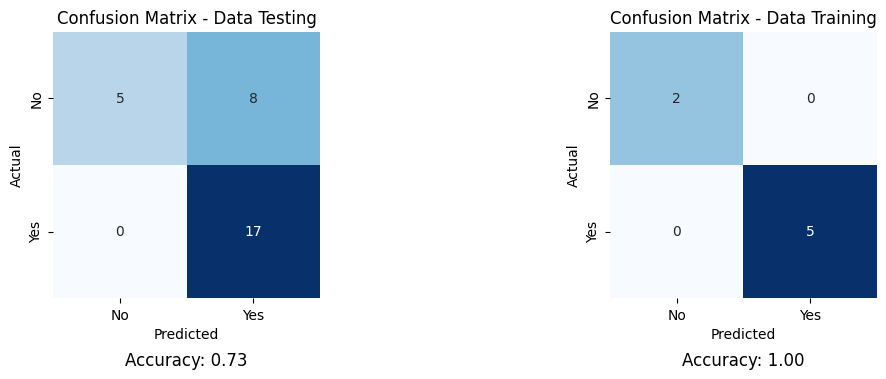

In [122]:
import seaborn as sns

# Membuat plot dengan seaborn
plt.figure(figsize=(12, 4))

# Plot matriks konfusi untuk data pengujian
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix - Data Testing")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.text(0.5, -0.25, f"Accuracy: {ac:.2f}", size=12, ha="center", transform=plt.gca().transAxes)

# Plot matriks konfusi untuk data pelatihan
plt.subplot(1, 2, 2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix - Data Training")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.text(0.5, -0.25, f"Accuracy: {ac_train:.2f}", size=12, ha="center", transform=plt.gca().transAxes)

# Penataan layout dan menampilkan plot
plt.tight_layout()
plt.show()
